<a href="https://colab.research.google.com/github/akhilsrinath/soccer-analytics/blob/main/Types_of_passes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **CLUSTERING**

#### Identifying different types of passes 

In [3]:
import requests 
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm_notebook

In [4]:
base_url = "https://raw.githubusercontent.com/statsbomb/open-data/master/data/"
comp_url = base_url + "matches/{}/{}.json"
match_url = base_url + "events/{}.json"

In [5]:
def parse_data(competition_id, season_id):
    matches = requests.get(url=comp_url.format(competition_id, season_id)).json()
    match_ids = [m['match_id'] for m in matches]

    all_events = []
    for match_id in tqdm_notebook(match_ids):

        events = requests.get(url=match_url.format(match_id)).json()
        passes = [x for x in events if x['type']['name'] == "Pass"]
                
        for p in passes:
            attributes = {
                "x": p['location'][0],
                "y": p['location'][1],
                "end_x": p['pass']['end_location'][0],
                "end_y": p['pass']['end_location'][1],
                "outcome": 0 if 'outcome' in p['pass'].keys() else 1,
            }
            all_events.append(attributes)
            
    return pd.DataFrame(all_events)

The parse_data function has been adjusted such that only passes are collected, and some new attributes, including:

- x - the x-coordinate of the origin of the pass
ranges from 0 to 120
- y - the y-coordinate of the origin of the pass
ranges from 0 to 80
- end_x - the x-coordinate of the end of the pass
ranges from 0 to 120
- end_y - the y-coordinate of the end of the pass
ranges from 0 to 80
- outcome - did the pass complete successfully

In [6]:
competition_id = 43
season_id = 3
df = parse_data(competition_id, season_id)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  


  0%|          | 0/64 [00:00<?, ?it/s]

In [7]:
## Importing KMeans

from sklearn.cluster import KMeans
model = KMeans(n_clusters=50)

In [9]:
features = df[['x', 'y', 'end_x', 'end_y']]
fit = model.fit(features)

In [10]:
df['cluster'] = model.predict(features)
df.head(10)

,x,y,end_x,end_y,outcome,cluster
0,61.0,41.0,31.0,55.0,1,11
1,32.0,59.0,85.0,77.0,0,15
2,36.0,4.0,56.0,12.0,0,44
3,65.0,70.0,65.0,73.0,0,35
4,58.0,62.0,40.0,58.0,1,9
5,40.0,57.0,35.0,52.0,1,22
6,35.0,53.0,41.0,56.0,1,22
7,41.0,56.0,33.0,48.0,1,22
8,33.0,52.0,36.0,30.0,1,7
9,47.0,12.0,57.0,18.0,1,44


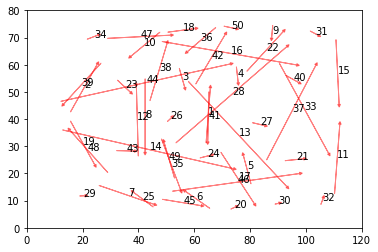

In [11]:
for i, (x, y, end_x, end_y) in enumerate(fit.cluster_centers_):
    plt.arrow(x, y, end_x-x, end_y-y,
              head_width=1,
              head_length=1,
              color='red',
              alpha=0.5,
              length_includes_head=True)
    
    plt.text((x+end_x)/2, (y+end_y)/2, str(i+1))
    
plt.xlim(0,120)
plt.ylim(0,80)
plt.show()